<a href="https://colab.research.google.com/github/Haralld/python_fullstack_class/blob/main/first_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML #4 "Создание и обучение первой нейронной сети."

1) Подключение библиотек

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import random

from tensorflow import keras
from keras import layers
from keras.models import Sequential
import pathlib
from typing import List, Tuple, Union

2) Загрузка и извлечение датасета


In [ ]:
dataset_url: str = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir: pathlib.Path = pathlib.Path(tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)).with_suffix('')

228813984/228813984 [==============================] - 2s 0us/step


3) Проверка датасета

In [ ]:
image_count: int = len(list(dataset_dir.glob("*/*.jpg")))
print(image_count)

3670


4) Подготовка данных и модели

In [ ]:
batch_size = 32
img_widht = 180
img_height = 180
random_seed = random.randint(0, 9999)

def create_image_dataset(
    dataset_dir: pathlib.Path,
    subset: str,
    image_size: Tuple[int, int],
    batch_size: int
) -> tf.data.Dataset:
  return tf.keras.utils.image_dataset_from_directory(
      dataset_dir,
      validation_split=0.2,
      subset=subset,
      seed=random_seed,
      image_size=image_size,
      batch_size=batch_size
  )

train_ds_original: tf.data.Dataset = create_image_dataset(dataset_dir, 'training', (img_height, img_widht), batch_size)
val_ds_original: tf.data.Dataset = create_image_dataset(dataset_dir, 'validation', (img_height, img_widht), batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


5) Подготовака данных с кэшированием и предварительной загрузкой

In [ ]:
class_names: list[str] = train_ds_original.class_names
print(f'Class names: {class_names}')

AUTOTUNE: int = tf.data.AUTOTUNE
train_ds = train_ds_original.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds_original.cache().prefetch(buffer_size=AUTOTUNE)

Class names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


6) Создание модели нейронной сети

In [ ]:
num_classes: int = len(class_names)
model: keras.Sequential = Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_widht, 3)),
    layers.Conv2D(16, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

7) Компиляция модели

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

8) Обучение модели

In [ ]:
epochs: int = 10
history: keras.callbacks.History = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 159s 2s/step - loss: 1.3699 - accuracy: 0.4554 - val_loss: 1.1722 - val_accuracy: 0.5204
Epoch 2/10
92/92 [==============================] - 155s 2s/step - loss: 0.9467 - accuracy: 0.6270 - val_loss: 1.1043 - val_accuracy: 0.5790
Epoch 3/10
92/92 [==============================] - 149s 2s/step - loss: 0.7029 - accuracy: 0.7357 - val_loss: 1.1241 - val_accuracy: 0.5940
Epoch 4/10
92/92 [==============================] - 117s 1s/step - loss: 0.4688 - accuracy: 0.8348 - val_loss: 1.2181 - val_accuracy: 0.5681
Epoch 5/10
92/92 [==============================] - 153s 2s/step - loss: 0.2674 - accuracy: 0.9108 - val_loss: 1.5125 - val_accuracy: 0.5763
Epoch 6/10
92/92 [==============================] - 130s 1s/step - loss: 0.1167 - accuracy: 0.9632 - val_loss: 1.7222 - val_accuracy: 0.5749
Epoch 7/10
92/92 [==============================] - 135s 1s/step - loss: 0.0483 - accuracy: 0.9884 - val_loss: 2.1614 - val_accuracy: 0.5695
Epoch 8/10
92

9) Получение истории обучения модели

In [ ]:
print(history.history)

{'loss': [1.3698655366897583, 0.9466642737388611, 0.7029302716255188, 0.46882501244544983, 0.2674042880535126, 0.11669886857271194, 0.048320360481739044, 0.043411921709775925, 0.036526743322610855, 0.06574162095785141], 'accuracy': [0.45538148283958435, 0.627043604850769, 0.7356948256492615, 0.8348092436790466, 0.9107629656791687, 0.9632152318954468, 0.9884195923805237, 0.988760232925415, 0.9908038377761841, 0.9799046516418457], 'val_loss': [1.172158122062683, 1.1042569875717163, 1.124140977859497, 1.2180848121643066, 1.5124543905258179, 1.722170114517212, 2.161418914794922, 2.2416772842407227, 2.421945571899414, 2.4018869400024414], 'val_accuracy': [0.5204359889030457, 0.5790190696716309, 0.5940054655075073, 0.5681198835372925, 0.5762943029403687, 0.5749318599700928, 0.5694822669029236, 0.587193489074707, 0.5899182558059692, 0.5749318599700928]}


10) Визуализация данных

<function matplotlib.pyplot.show(close=None, block=None)>

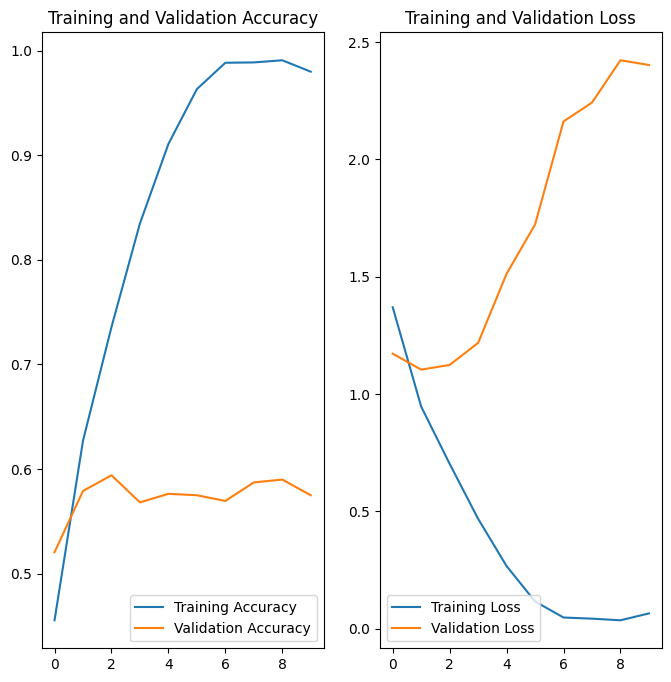

In [ ]:
acc: list[float] = history.history['accuracy']
val_acc: list[float] = history.history['val_accuracy']
loss: list[float] = history.history['loss']
val_loss: list[float] = history.history['val_loss']
epochs_range: range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show


ML #5 Дообучение нейронной сети

1) Дообучение модели


In [ ]:
epochs: int = 20
history: keras.callbacks.History = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)


Epoch 1/20
92/92 [==============================] - 131s 1s/step - loss: 0.0245 - accuracy: 0.9959 - val_loss: 2.5480 - val_accuracy: 0.5504
Epoch 2/20
92/92 [==============================] - 125s 1s/step - loss: 0.0166 - accuracy: 0.9969 - val_loss: 2.6352 - val_accuracy: 0.5858
Epoch 3/20
92/92 [==============================] - 137s 1s/step - loss: 0.0068 - accuracy: 0.9993 - val_loss: 2.6242 - val_accuracy: 0.5913
Epoch 4/20
92/92 [==============================] - 139s 1s/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 2.7993 - val_accuracy: 0.5777
Epoch 5/20
92/92 [==============================] - 136s 1s/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 2.8243 - val_accuracy: 0.5831
Epoch 6/20
92/92 [==============================] - 123s 1s/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 2.9213 - val_accuracy: 0.5654
Epoch 7/20
92/92 [==============================] - 159s 2s/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 2.8702 - val_accuracy: 0.5845
Epoch 8/20
92

2) Визуализация результатов обучения нейронной сети

<function matplotlib.pyplot.show(close=None, block=None)>

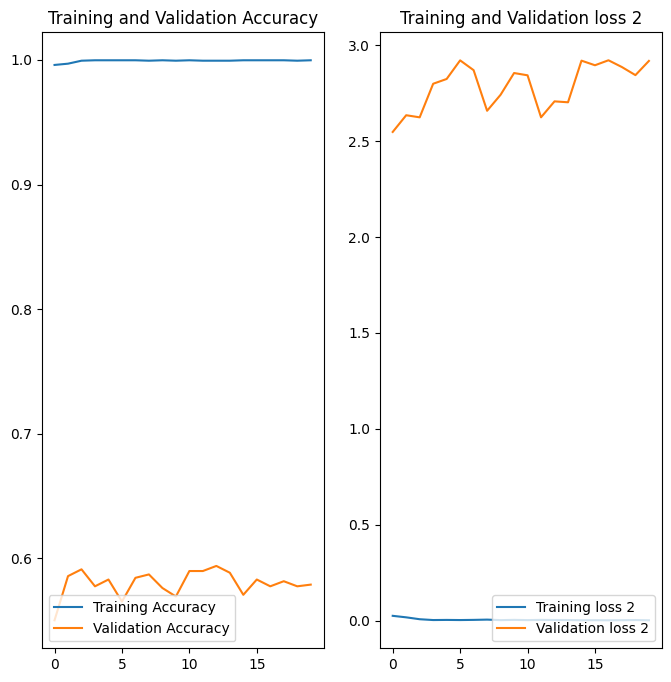

In [ ]:
acc: list[float] = history.history['accuracy']
val_acc: list[float] = history.history['val_accuracy']
loss: list[float] = history.history['loss']
val_loss: list[float] = history.history['val_loss']
epochs_range: list[int] = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss 2')
plt.plot(epochs_range, val_loss, label='Validation loss 2')
plt.legend(loc='lower right')
plt.title('Training and Validation loss 2')
plt.show

3) Инференс модели

In [ ]:
sunflower_url: str = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path: str = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img: PIL.JpegImagePlugin.JpegImageFile = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_widht)
)
img_array: np.ndarray = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions: np.ndarray = model.predict(img_array)
score: tf.Tensor = tf.nn.softmax(predictions[0])

print('На изображении  {} ({:.2f}% вероятность)'.format(
    class_names[np.argmax(score)],
    100 * np.max(score)
))


1/1 [==============================] - 0s 144ms/step
На изображении  sunflowers (99.93% вероятность)


4) Сохранение модели локально

In [ ]:
from google.colab import files

model_file_name: str = "my_flowers_model.h5"
model.save(model_file_name)
files.download(model_file_name)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>